**Author:** Maciej Tarsa <br>
**Date:** 30 December 2020

# Page View Time Series Visualizer

This is the implementation of the project from Data Analysis with Python course at freeCodeCamp.org

### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
- Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
- Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

#### Figure 1
![Figure1](img/04_Figure_1.png)

#### Figure 2
![Figure2](img/04_Figure_2.png)

#### Figure 3
![Figure2](img/04_Figure_3.png)

### Solution

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [47]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], index_col=0)

# Clean data
df = df[(df['value'] > df['value'].quantile(0.025))
       & (df['value'] < df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, axs = plt.subplots(1, 1)

    fig.set_figwidth(15)
    fig.set_figheight(5)
    
    plt.plot(df.index, df['value'], color='r')
    #axes = plt.plot(df.index, df['value'], color='Red')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy().reset_index(inplace=False)
    df_bar['year']=pd.DatetimeIndex(df_bar['date']).year
    df_bar['month']=pd.DatetimeIndex(df_bar['date']).month_name()
    df_bar = df_bar.groupby(["year","month"])["value"].mean().unstack()

    # Draw bar plot

    axes = df_bar.plot.bar(figsize=(14,14))
    plt.xlabel('Years', fontsize=14)
    plt.ylabel('Average Page Views', fontsize=14)
    plt.xlabel('Years', fontsize= 14)
    plt.ylabel('Average Page Views', fontsize= 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    fig = axes.get_figure()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().reset_index(inplace=False)
    # I had to amends the two beloe, because they were not recognised as strings
    df_box['year'] = pd.DatetimeIndex(df_box['date']).year
    df_box['month'] = pd.DatetimeIndex(df_box['date']).month
    # I used calendar library in order to convert integer month to abbreviated string
    df_box['month'] = df_box['month'].apply(lambda x: calendar.month_abbr[x])
    # sort the values
    df_box.sort_values(by=['year','date'],ascending=[False,True],inplace=True)

    # Draw box plots (using Seaborn)

    # first, set up the screen with two graphs
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    # first plot
    ax1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.set_title('Year-wise Box Plot (Trend)')

    # second plot
    labels = ['Jan',' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax2 = sns.boxplot(x='month', y='value', data=df_box)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.set_title('Month-wise Box Plot (Seasonality)')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


### Test the solution

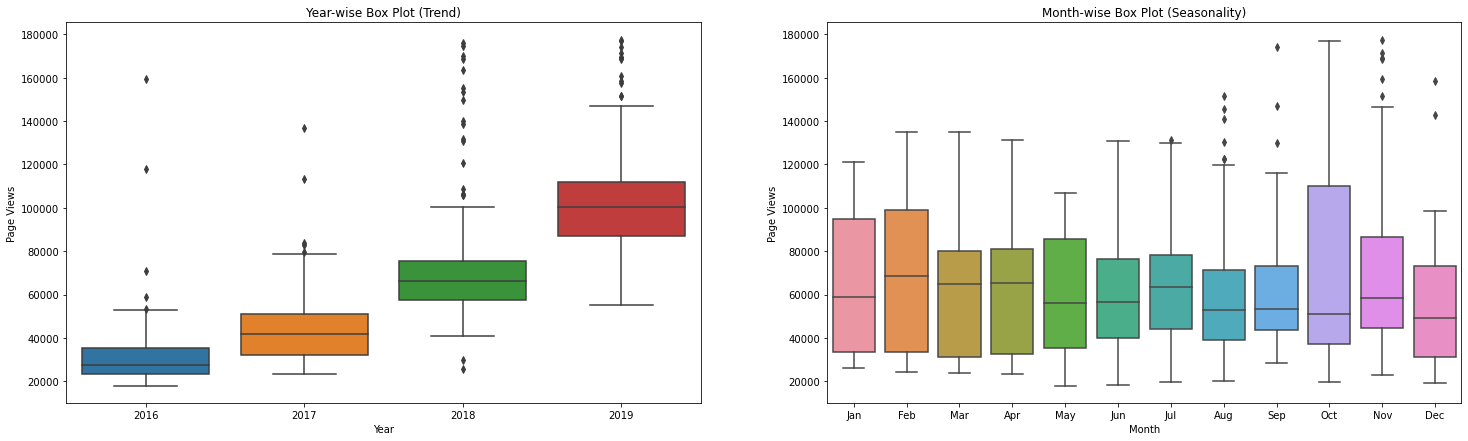

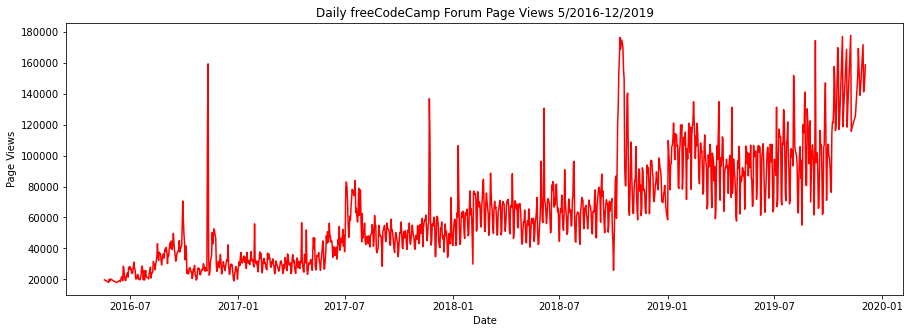

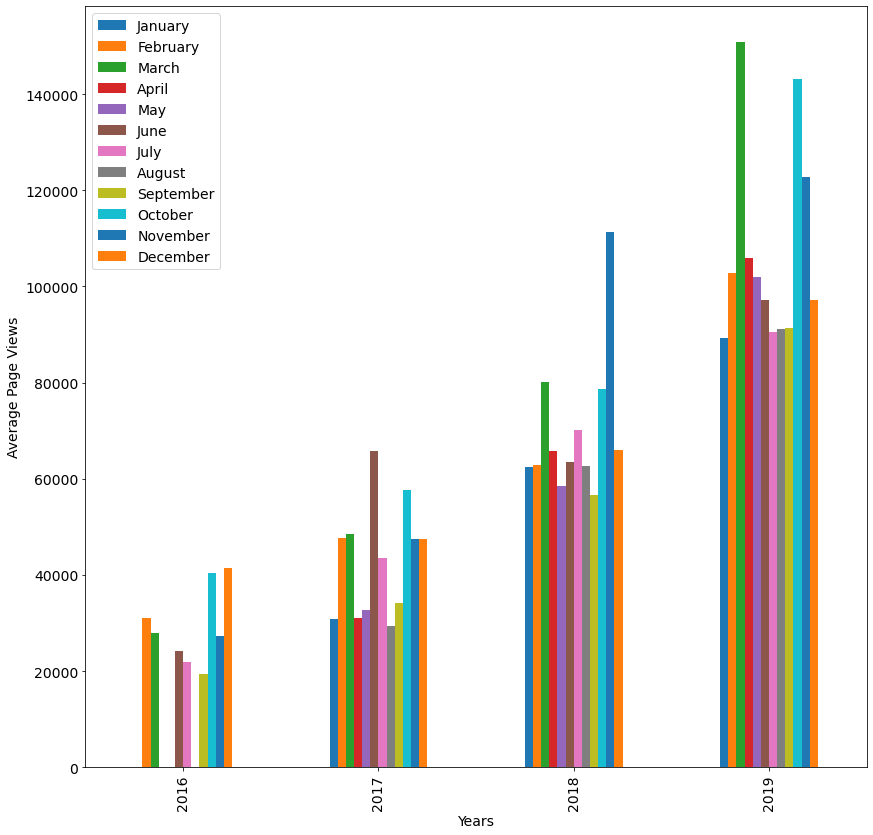

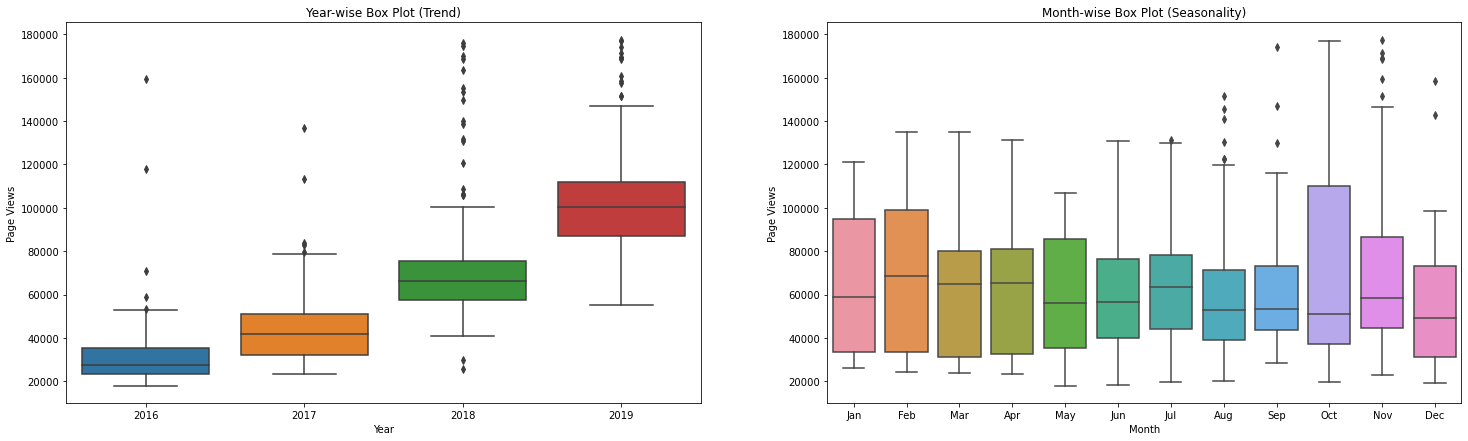

In [48]:
# Test your function by calling it here
draw_line_plot()
draw_bar_plot()
draw_box_plot()

## Code elaboration

In this section, I include the code I used to arrive at the solutions to each section

In [4]:
# import data
df = pd.read_csv('fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [5]:
# the date value is an object, I want to parse it as date
df.dtypes

date     object
value     int64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [7]:
# I can also do this while reading csv
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0])
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [8]:
# I also want to set the date as index
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], index_col=0)

##### Clean the data

I need to filter out the days when page views where in the top 2.5% of the dataser or bottom 2.5% of the dataset

In [9]:
# I start with 1304 values
len(df)

1304

In [10]:
# filtering out so that only values that are not in bottom or top 2.5% remain
df = df[(df['value'] > df['value'].quantile(0.025))
       & (df['value'] < df['value'].quantile(0.975))]

In [11]:
# I am left with 1238 values
len(df)

1238

##### Draw a line plot

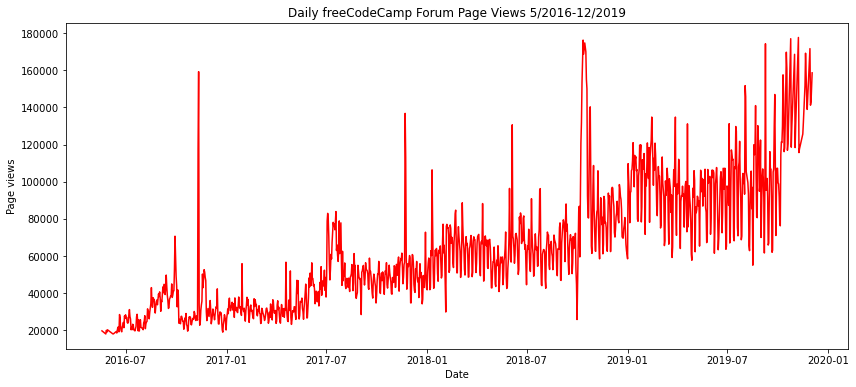

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['value'], color='Red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page views')
plt.show()

##### Draw a bar plot

In [13]:
# I want to extract cvalues for year and month from the index and make a new column out of them
df_bar = df.copy().reset_index(inplace=False)
df_bar['year']=pd.DatetimeIndex(df_bar['date']).year
df_bar['month']=pd.DatetimeIndex(df_bar['date']).month_name()
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,November
1234,2019-11-29,171584,2019,November
1235,2019-11-30,141161,2019,November
1236,2019-12-01,142918,2019,December


In [14]:
# now groupy by y-m and show mean/average values
df_bar = df_bar.groupby(["year","month"])["value"].mean().unstack()
df_bar

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


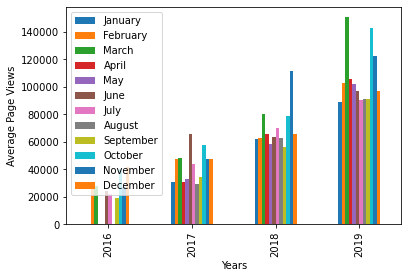

In [15]:
df_bar.plot.bar()
plt.xlabel('Years', fontsize=10)
plt.ylabel('Average Page Views', fontsize=10)
plt.xlabel('Years', fontsize= 10)
plt.ylabel('Average Page Views', fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

##### Draw a box plot

In [37]:
# Code already written that makes a copy of the data
df_box = df.copy().reset_index(inplace=False)
# I had to amends the two beloe, because they were not recognised as strings
df_box['year'] = pd.DatetimeIndex(df_box['date']).year
df_box['month'] = pd.DatetimeIndex(df_box['date']).month
# I used calendar library in order to convert integer month to abbreviated string
df_box['month'] = df_box['month'].apply(lambda x: calendar.month_abbr[x])
# sort the values
df_box.sort_values(by=['year','date'],ascending=[False,True],inplace=True)

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

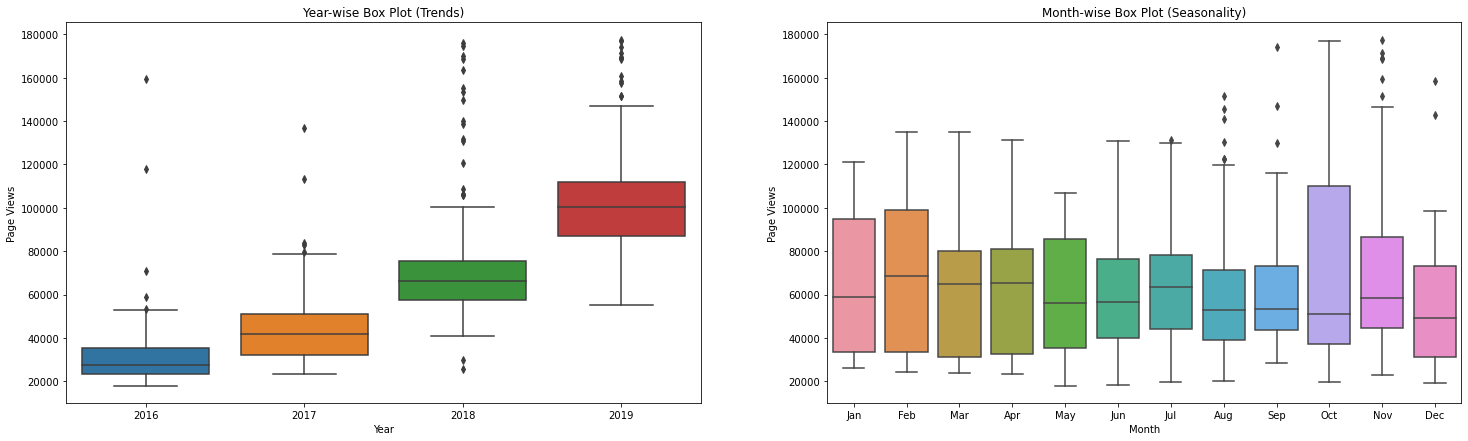

In [38]:
# first, set up the screen with two graphs
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(25)
fig.set_figheight(7)

# first plot
ax1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')

# second plot
labels = ['Jan',' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2 = sns.boxplot(x='month', y='value', data=df_box)
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')

